**Import Libaries**

In [93]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Extracting Features to name columns in database**

In [94]:
with open("features.txt") as f:
    lines = f.readlines()
    # for i in lines:
    #     feature.append(i.replace("\n", "").split()[1])
    features = list(map(lambda x : x.replace("\n", "").split()[1], lines))
features.append("Activity")
print(features)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

**Converitng training text to csv format**

In [95]:
X_train = pd.read_csv("X_train.txt", sep='\s+', header=None)
y_train = pd.read_csv("y_train.txt", sep='\s+', header=None)

train_data = pd.concat([X_train, y_train], axis=1)
train_data.columns = features
train_data.to_csv("train_data.csv", index=False)

In [96]:
train_data.shape

(7352, 562)

**Converitng train text to csv format**

In [97]:
X_test = pd.read_csv("X_test.txt", sep='\s+', header=None)
y_test = pd.read_csv("y_test.txt", sep='\s+', header=None)
test_data = pd.concat([X_test, y_test], axis=1)
test_data.columns = features
test_data.to_csv("test_data.csv", index=False)

In [98]:
test_data.shape

(2947, 562)

In [75]:
df_train = pd.read_csv("train_data.csv")

In [76]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [77]:
df_train.shape

(7352, 562)

In [78]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,6.000000


In [79]:
df_test = pd.read_csv("test_data.csv")

In [80]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5


In [81]:
df_test.shape

(2947, 562)

In [82]:
df_test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,3.577876
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,1.740348
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,1.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,2.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,4.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,5.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,6.000000


<h1>Approach 1:</h1>

Data used is X_train + y_train

Description:  
* Used only X_train + y_train and performed a 70%(train), 30%(test) train test split.
* Used Decision tree classifier with varying tree depths from range 1 to 16.


Train the Decision Tree classifier for tree depths ranging from 1 to 16.

For each tree depth (from 1 to 16):
* The model is trained using the training data (X_train, y_train).
* Predictions are generated for both the training and test datasets.
* The training and test accuracies are computed and stored.

In [83]:

X = df_train.drop(columns=["Activity"])
y = df_train["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_accuracies = []
test_accuracies = []
tree_depths = range(1 , 16)
for depths in tree_depths:
    model = DecisionTreeClassifier(max_depth=depths, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

In [84]:
y_train_pred.shape

(5146,)

In [85]:
y_test_pred.shape

(2206,)

<b>Model Performance <b>
* This code analyzes the model performance by iterating through different depths and corresponding training and test accuracies.

In [86]:
for depths, train_acc, test_acc in zip(tree_depths, train_accuracies, test_accuracies):
    print(f"Depth: {depths}, Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Depth: 1, Training Accuracy: 0.3774, Test Accuracy: 0.3803
Depth: 2, Training Accuracy: 0.5445, Test Accuracy: 0.5462
Depth: 3, Training Accuracy: 0.7835, Test Accuracy: 0.7874
Depth: 4, Training Accuracy: 0.8947, Test Accuracy: 0.8867
Depth: 5, Training Accuracy: 0.9151, Test Accuracy: 0.8998
Depth: 6, Training Accuracy: 0.9400, Test Accuracy: 0.9316
Depth: 7, Training Accuracy: 0.9600, Test Accuracy: 0.9343
Depth: 8, Training Accuracy: 0.9777, Test Accuracy: 0.9402
Depth: 9, Training Accuracy: 0.9887, Test Accuracy: 0.9465
Depth: 10, Training Accuracy: 0.9934, Test Accuracy: 0.9379
Depth: 11, Training Accuracy: 0.9965, Test Accuracy: 0.9456
Depth: 12, Training Accuracy: 0.9977, Test Accuracy: 0.9488
Depth: 13, Training Accuracy: 0.9984, Test Accuracy: 0.9447
Depth: 14, Training Accuracy: 0.9988, Test Accuracy: 0.9424
Depth: 15, Training Accuracy: 0.9994, Test Accuracy: 0.9433


<b> Save the model using Pickle </b>
* Saving th model helps in saving time as we do not have to train the model repeatedly

In [ ]:
import pickle
with open(f"decision_tree_depth_{depths}.pkl", "wb") as file:
        pickle.dump(model, file)

<b> Bias-Variance Tradeoff </b>
* This code generates a plot to illustrate the Bias-Variance Tradeoff by displaying training and test accuracies across various tree depths.
* It helps assess model performance as complexity increases, revealing signs of underfitting (high bias) and overfitting (high variance).

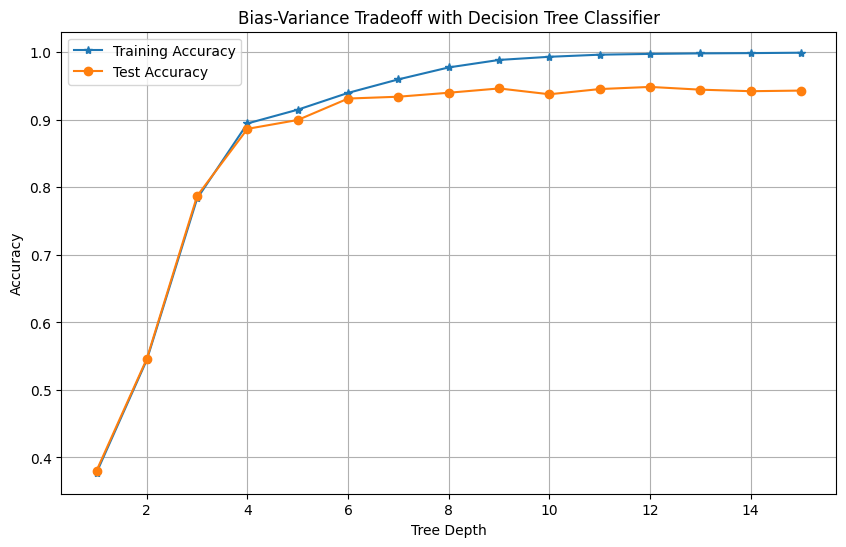

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, train_accuracies, label="Training Accuracy", marker='*')
plt.plot(tree_depths, test_accuracies, label="Test Accuracy", marker='o')
plt.title("Bias-Variance Tradeoff with Decision Tree Classifier")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

<b>Conclusion</b>

The above graph shows the training and test accuracy of the Decision Tree classifier across tree depths (1 to 14).

* For the starting 2 tree depths, both training and test accuracies are very low. This indicates that the model is too simple to capture patterns in the data, leading to high bias and underfitting.

* From tree depths 4 to 6, both training and test accuracies increase significantly, and the test accuracy approaches its peak. This range provides a good tradeoff between bias and variance.

* Beyond tree depth 6, the training accuracy reaches nearly 100%, showing the model overfits the training data and learns noise, leading to high variance. The test accuracy, however, plateaus and even slightly drops, indicating a lack of generalization.

<h1>Approach 2</h1>

Data used is X_train + y_train for training and X_test and y_test for testing


Description:  Used  X_train + y_train for training and X_test and y_test for testing. Used Decision tree classifier with varying tree depths (1 to 16) from range 1 to 20.



* This code separates the features (X_test) and the target variable (y_test) from the test dataset (df_test).
* The "Activity" column is dropped from df_test to create X_test, which contains the feature data, and y_test contains the target labels "Activity" column.

In [89]:
x_test = df_test.drop(columns=["Activity"])
y_test = df_test["Activity"]

<b>Training Decison Tree Clasifier </b>for different tree depths from 1 to 16.


For each tree depths (1 to 16):
* Predictions are made on testing data.
* Testing accuracies are calculated and stored.

In [90]:
X = df_train.drop(columns=["Activity"])
y = df_train["Activity"]
train_accuracies = []
test_accuracies = []
tree_depths = range(1 , 16)
for depths in tree_depths:
    model = DecisionTreeClassifier(max_depth=depths, random_state=42)
    model.fit(X, y)
    y_test_pred = model.predict(x_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

<b>Model Performance <b>
* This code analyzes the model performance by iterating through different depths and corresponding training and test accuracies.

In [91]:
for depths, test_acc in zip(tree_depths, test_accuracies):
    print(f"Depth: {depths}, Test Accuracy: {test_acc:.4f}")

Depth: 1, Test Accuracy: 0.3627
Depth: 2, Test Accuracy: 0.5310
Depth: 3, Test Accuracy: 0.7224
Depth: 4, Test Accuracy: 0.8096
Depth: 5, Test Accuracy: 0.8381
Depth: 6, Test Accuracy: 0.8544
Depth: 7, Test Accuracy: 0.8619
Depth: 8, Test Accuracy: 0.8683
Depth: 9, Test Accuracy: 0.8700
Depth: 10, Test Accuracy: 0.8626
Depth: 11, Test Accuracy: 0.8687
Depth: 12, Test Accuracy: 0.8643
Depth: 13, Test Accuracy: 0.8605
Depth: 14, Test Accuracy: 0.8527
Depth: 15, Test Accuracy: 0.8629


<b> Bias-Variance Tradeoff </b>
* This code generates a plot to illustrate the Bias-Variance Tradeoff by displaying training and test accuracies across various tree depths.
* It helps assess model performance as complexity increases, revealing signs of underfitting (high bias) and overfitting (high variance).

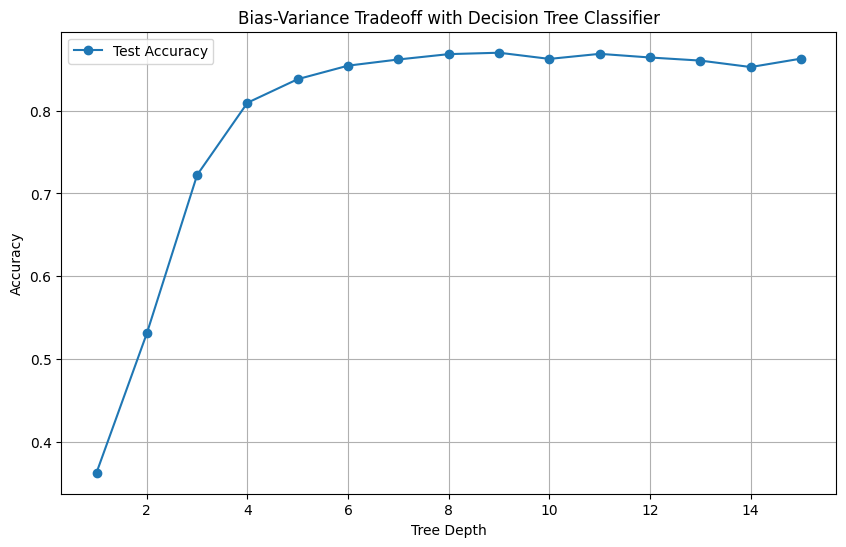

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, test_accuracies, label="Test Accuracy", marker='o')
plt.title("Bias-Variance Tradeoff with Decision Tree Classifier")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

<b>Conclusion</b>

The above graph shows the test accuracy of the Decision Tree classifier across tree depths ranging from 1 to 15.

* For lower tree depths (1 to 3): The test accuracy starts low, as the model is too simple to capture patterns in the data. This indicates high bias and results in underfitting.
* For intermediate tree depths (4 to 8): The test accuracy increases significantly and reaches its peak around depth 8, where the accuracy stabilizes close to 87%. This indicates the model is capturing patterns effectively while still generalizing well.
* For higher tree depths (9 to 15): The test accuracy plateaus with minimal improvement, and there is a slight fluctuation around depth 14. This suggests the model is no longer improving and may start to overfit the data slightly as the depth increases further